# Лабораторная работа № 2

## Задания

![tasks](./tasks.png)

## Реализация

### Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Распишем систему для dx/dt, dy/dt и dq/dt. Т.к. p - константа, которая задаётся при запуске программы, то её находить не нужно

In [2]:
def dxdt(p, y):
    return p * (1 + y**2)**2

In [3]:
def dydt(q, y):
    return q * (1 + y**2)**2

In [4]:
def dqdt(y):
    return -2 * y / (1 + y**2)

Решим численно через метод Рунге-Кутты 4 порядка точности

In [5]:
def runge(h, t_min, t_max, iter_count, x0, y0, q0, p):
    t, x, y, q = np.zeros(iter_count), np.zeros(iter_count), np.zeros(iter_count), np.zeros(iter_count)
    
    t[0], x[0], y[0], q[0] = t_min, x0, y0, q0

    dt = (t_max - t_min)/iter_count

    for i in range(1, iter_count):
        k1_x = h*dxdt(p, y[i-1])
        k1_y = h*dydt(q[i-1], y[i-1])
        k1_q = h*dqdt(y[i-1])

        k2_x = h*dxdt(p, y[i-1] + k1_x/2)
        k2_y = h*dydt(q[i-1] + k1_y/2, y[i-1] + k1_y/2)
        k2_q = h*dqdt(y[i-1] + k1_q/2)

        k3_x = h*dxdt(p, y[i-1] + k2_x/2)
        k3_y = h*dydt(q[i-1] + k2_y/2, y[i-1] + k2_y/2)
        k3_q = h*dqdt(y[i-1] + k2_q/2)

        k4_x = h*dxdt(p, y[i-1] + k3_x)
        k4_y = h*dydt(q[i-1] + k3_y, y[i-1] + k3_y)
        k4_q = h*dqdt(y[i-1] + k3_q)

        t[i] = t[i-1] + i*dt
        x[i] = x[i-1] + 1/6 * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y[i] = y[i-1] + 1/6 * (k1_y + 2*k2_y + 2*k3_y + k4_y)
        q[i] = q[i-1] + 1/6 * (k1_q + 2*k2_q + 2*k3_q + k4_q)
        
    return t, x, y, q

Параметры

In [6]:
t_min, t_max = 0, 1
iter_count = 30000
h = 0.001
p_values = [0.9, 0.8, 0.7, 0.6]
x0, y0 = 0, 0

График лучей

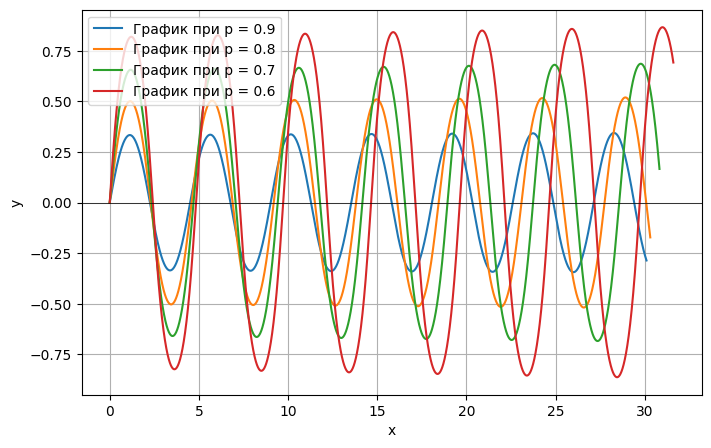

In [7]:
for p in p_values:
    q0 = np.sqrt(1 - p**2)
    t, x, y, q = runge(h, t_min, t_max, iter_count, x0, y0, q0, p)

    plt.plot(x, y, label=f"График при p = {p}")

plt.axhline(0, color="black", linewidth=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()